In [20]:
import numpy as np
import pandas as pd
from tensorflow import keras
#from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras import regularizers

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
os.chdir("/home/chaitanya/Documents/Vlsi/VLSI")
os.chdir('VLSI')
os.listdir()

['HeartRate_data.xls',
 '.ipynb_checkpoints',
 'falldeteciton.csv',
 'Finalizedmodel.sav',
 'VLSI.ipynb',
 'falldeteciton.xlsx',
 'HeartRate_data.csv',
 '.~lock.falldeteciton.csv#',
 'VLSI_FINAL.ipynb',
 'tree.jpg']

In [7]:
data = pd.read_csv('falldeteciton.csv')
data = shuffle(data)
data.describe()

,ACTIVITY,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,16382.000000,16382.000000
mean,2.361494,58.251068,211.536992,2894.341472
std,1.739195,48.292926,129.949521,3825.927830
min,0.000000,0.000000,33.000000,5.000000
25%,0.000000,25.000000,119.000000,587.000000
50%,3.000000,44.000000,180.000000,1581.000000
75%,4.000000,78.000000,271.000000,3539.000000
max,5.000000,533.000000,986.000000,52210.000000


In [8]:
data_Y = data['ACTIVITY']
data_Y = pd.DataFrame(data_Y)
# one hot encoding
data_Y['output_0'] = 0
data_Y['output_1'] = 0
data_Y['output_2'] = 0
data_Y['output_3'] = 0
data_Y['output_4'] = 0
data_Y['output_5'] = 0

def encode(data):
    for j in range(0,16381):
        i = str(data['ACTIVITY'][j])
        data[str('output_'+i)][j]+=1
    return data

data_Y = encode(data_Y)
data_Y.pop('ACTIVITY')
data_Y = shuffle(data_Y)
data_Y.head()

,output_0,output_1,output_2,output_3,output_4,output_5
2455,0,0,0,0,0,1
2061,1,0,0,0,0,0
6887,0,0,0,0,1,0
10796,1,0,0,0,0,0
1887,0,0,0,0,1,0


In [9]:
data.pop('ACTIVITY')
X_train, X_test, Y_train, Y_test = train_test_split(data, data_Y, test_size = 0.15, random_state = 41)

In [10]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_train = normalize(X_train)
X_test = normalize(X_test)
X_train.head()

,BP,HR,CIRCLUATION
10169,0.303940,0.079748,0.009214
14643,0.110694,0.250787,0.067695
10798,0.076923,0.019937,0.002452
242,0.262664,0.230850,0.075951
4986,0.024390,0.089192,0.007605


# Preprocessing is over.

In [11]:
Y_train.head()

,output_0,output_1,output_2,output_3,output_4,output_5
5669,1,0,0,0,0,0
15347,0,0,0,0,1,0
6337,0,0,0,1,0,0
15916,0,0,0,1,0,0
3420,0,0,0,0,0,1


## MODEL BUILDING

In [21]:
def mak_model():
    model = keras.Sequential([
        keras.layers.Dense(300, activation = tf.nn.relu, kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01), input_shape = (X_train.shape[1],), kernel_initializer = 'normal', use_bias = True, bias_initializer='zeros'),
        #keras.layers.Dense(10, activation = tf.nn.relu, kernel_initializer = 'normal', use_bias = True, bias_initializer='zeros'),
        keras.layers.Dropout(0.1),
        #keras.regularizers.l1_l2(l1=0.01, l2=0.01),
        #keras.layers.Dense(500, activation = tf.nn.relu),
        #keras.layers.Dense(15, activation = tf.nn.relu, kernel_initializer = 'normal', use_bias = True, bias_initializer='ones'),
        #keras.layers.Dropout(0.5),
        #keras.layers.Dense(10, activation = tf.nn.relu, kernel_initializer = 'normal'),
        keras.layers.Dense(6, activation = tf.nn.softmax, kernel_initializer="normal")
    ])
    
    #optimizer = tf.train.AdamOptimizer(0.001)
    model.compile(loss = 'categorical_crossentropy',optimizer = "adam", metrics = ['accuracy'])
    
    return model

model = mak_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 1806      
Total params: 3,006
Trainable params: 3,006
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Training
class printepoch(keras.callbacks.Callback):
    def on_each_epoch(self, epoch,logs):
        print("Epoch no. "+ str(epoch), end = "\n")

epochs = 50

#def one_zero(tensors):
    

history = model.fit(X_train, Y_train, epochs=epochs, validation_split = 0.33, verbose=1, callbacks= [printepoch()], batch_size = 2)
#estimator = KerasClassifier(build_fn = mak_model, epochs = epochs, batch_size = 5,verbose = 1)

Train on 9329 samples, validate on 4595 samples
Epoch 1/50
9329/9329 [==============================] - 6s 599us/step - loss: 1.6428 - acc: 0.2837 - val_loss: 1.6565 - val_acc: 0.2762
Epoch 2/50
9329/9329 [==============================] - 6s 600us/step - loss: 1.6426 - acc: 0.2837 - val_loss: 1.6562 - val_acc: 0.2762
Epoch 3/50
9329/9329 [==============================] - 6s 591us/step - loss: 1.6426 - acc: 0.2837 - val_loss: 1.6568 - val_acc: 0.2762
Epoch 4/50
9329/9329 [==============================] - 6s 613us/step - loss: 1.6427 - acc: 0.2837 - val_loss: 1.6571 - val_acc: 0.2762
Epoch 5/50
9329/9329 [==============================] - 6s 650us/step - loss: 1.6428 - acc: 0.2837 - val_loss: 1.6568 - val_acc: 0.2762
Epoch 6/50
9329/9329 [==============================] - 5s 565us/step - loss: 1.6427 - acc: 0.2837 - val_loss: 1.6562 - val_acc: 0.2762
Epoch 7/50
9329/9329 [==============================] - 5s 486us/step - loss: 1.6427 - acc: 0.2837 - val_loss: 1.6565 - val_acc: 0.2762


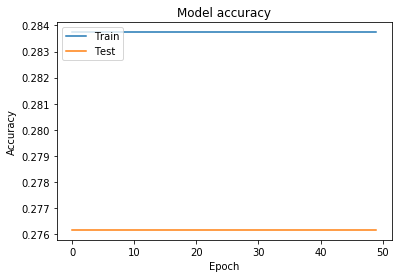

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

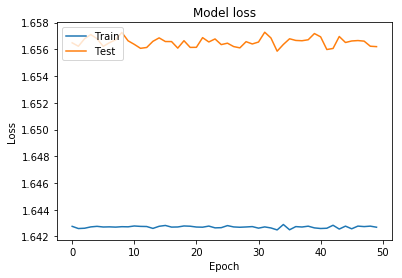

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()